In [5]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel
import numpy as np

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 6,
                   speed = 40.0,
                   observation_radius=np.inf,
                   observe_method="pyg",
                   observe_bitmap_dims = (40, 40),
                   require_explicit_visit=True
)

observations, infos = env.reset(seed=42)

# Display the env.state() bitmap using matplotlib.
import matplotlib.pyplot as plt
import numpy as np

state = env.state()
bitmap = state

graphLayer = bitmap[:,:,2]
graphNodes = graphLayer[np.where(graphLayer >= 0)]
print(f"Sum of node layer: {np.sum(graphNodes)}")
print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

agentLayer = bitmap[:,:,0]
agents = agentLayer[np.where(agentLayer >= 0)]

bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
bitmap[np.where(graphLayer >= 0)] = 255
bitmap[np.where(agentLayer >= 0)] = 0
plt.imshow(bitmap, aspect="equal")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: Not all nodes contain the same attributes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sum of node layer: 119.0
Expected sum of node layer: 780


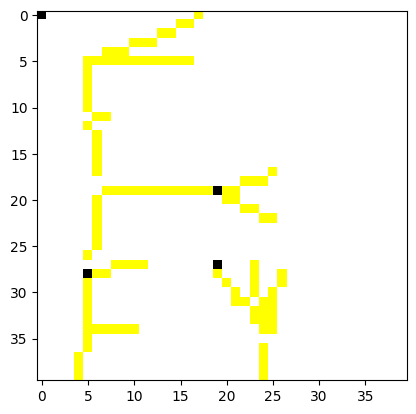

In [2]:
bitmap = env.observe(env.agents[0], radius=200)

graphLayer = bitmap[:,:,2]
graphNodes = graphLayer[np.where(graphLayer >= 0)]
print(f"Sum of node layer: {np.sum(graphNodes)}")
print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

agentLayer = bitmap[:,:,0]
agents = agentLayer[np.where(agentLayer >= 0)]

bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
bitmap[np.where(graphLayer >= 0)] = 255
bitmap[np.where(agentLayer >= 0)] = 0
plt.imshow(bitmap, aspect="equal")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': True}}
{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 1.0, 'stddev_idleness': 0.0, 'worst_idleness': 1.0}


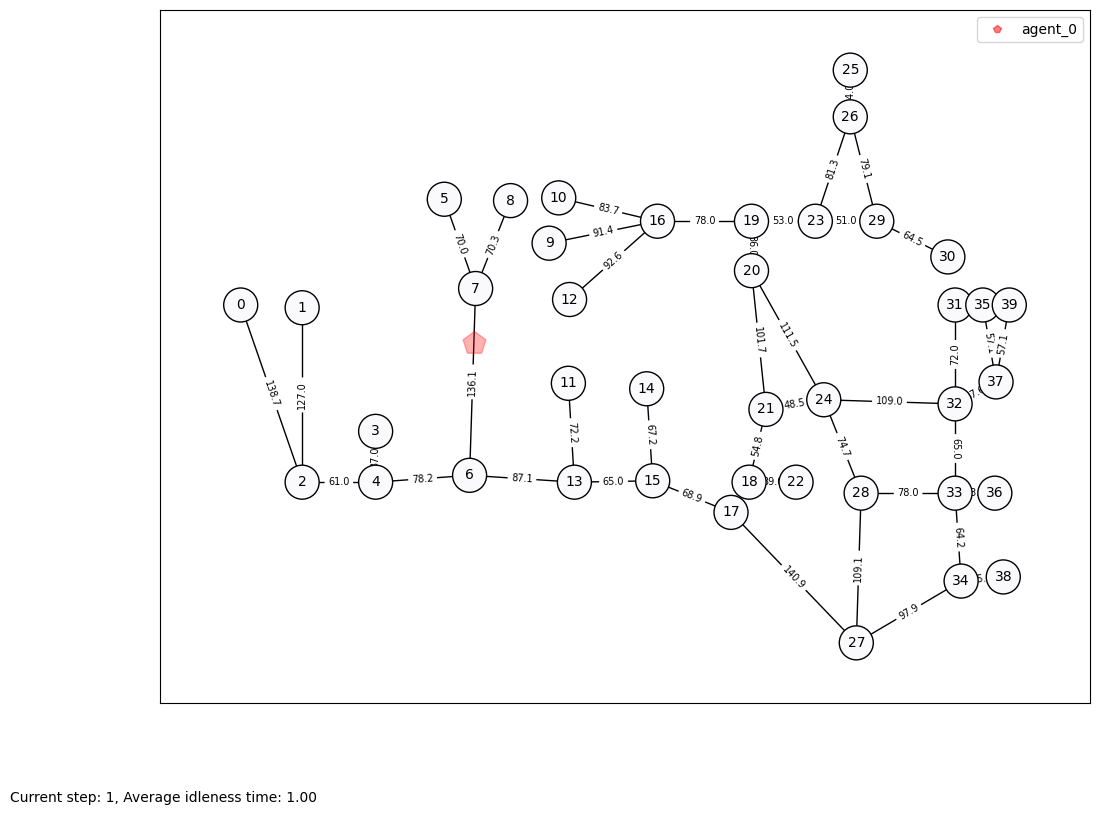

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 2.0, 'stddev_idleness': 0.0, 'worst_idleness': 2.0}


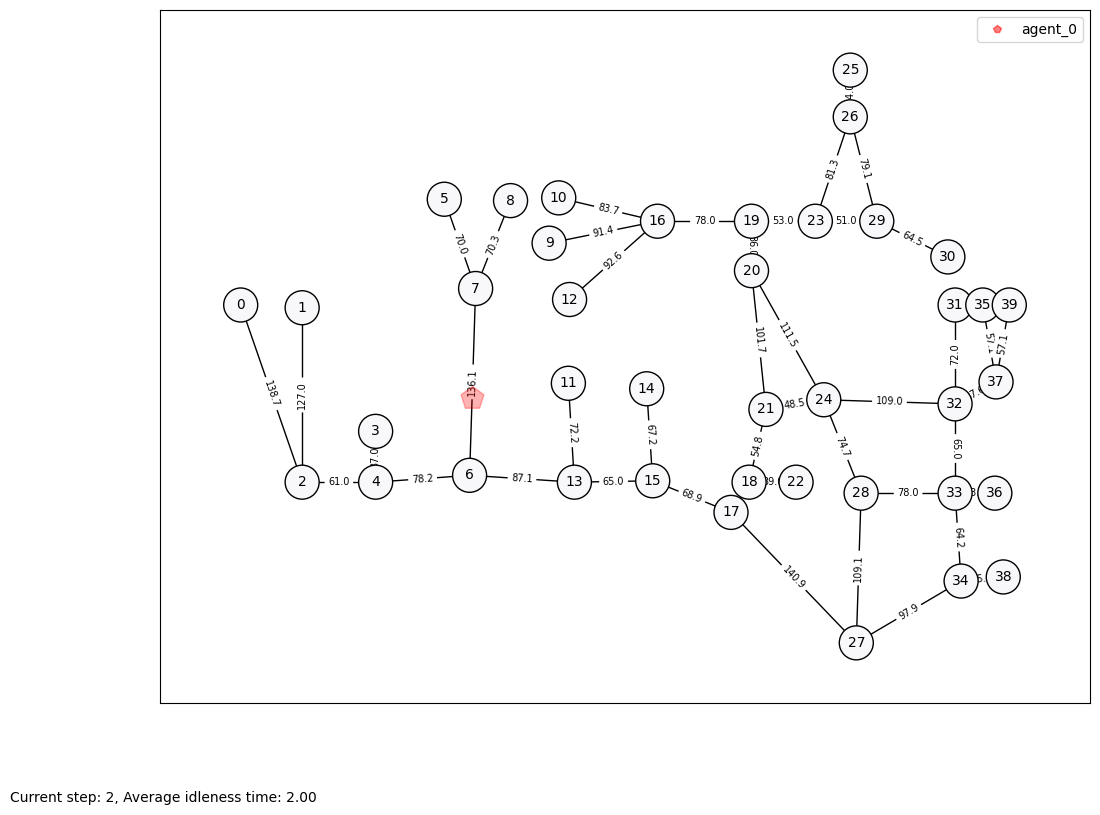

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 3.0, 'stddev_idleness': 0.0, 'worst_idleness': 3.0}


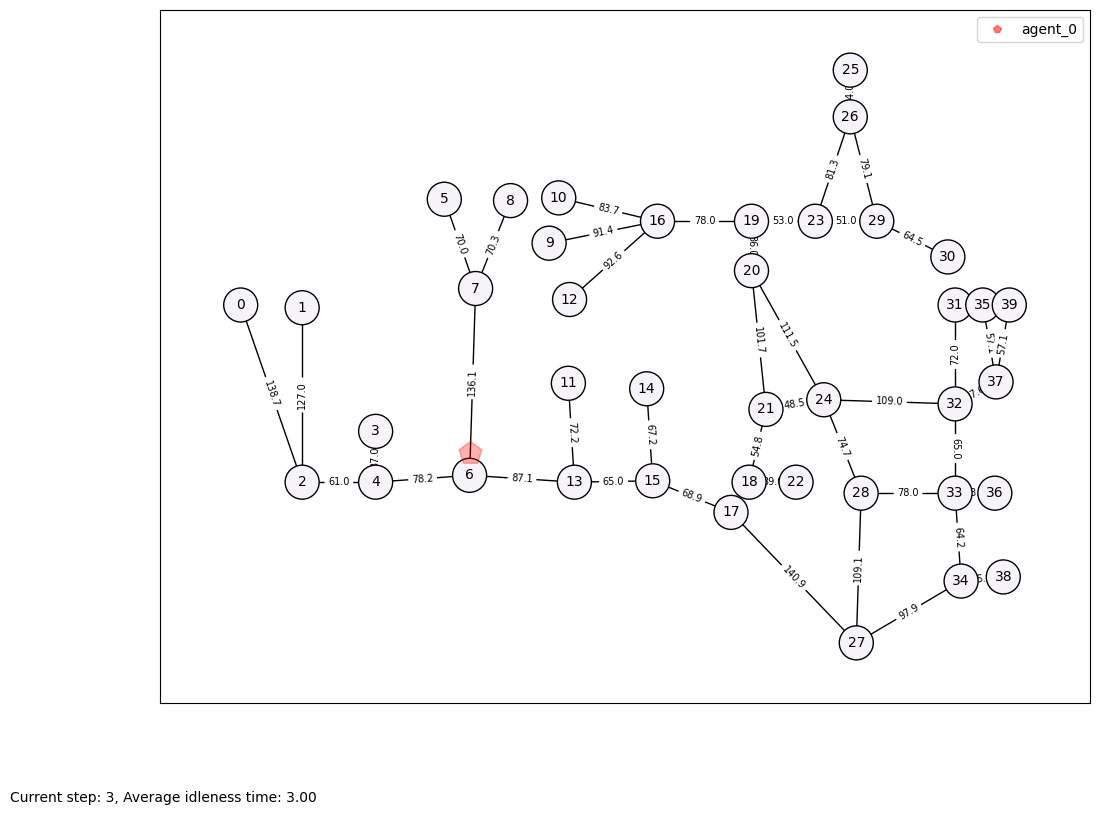

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': True}, 'node_visits': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 3.9, 'stddev_idleness': 0.6244997998398396, 'worst_idleness': 4.0}


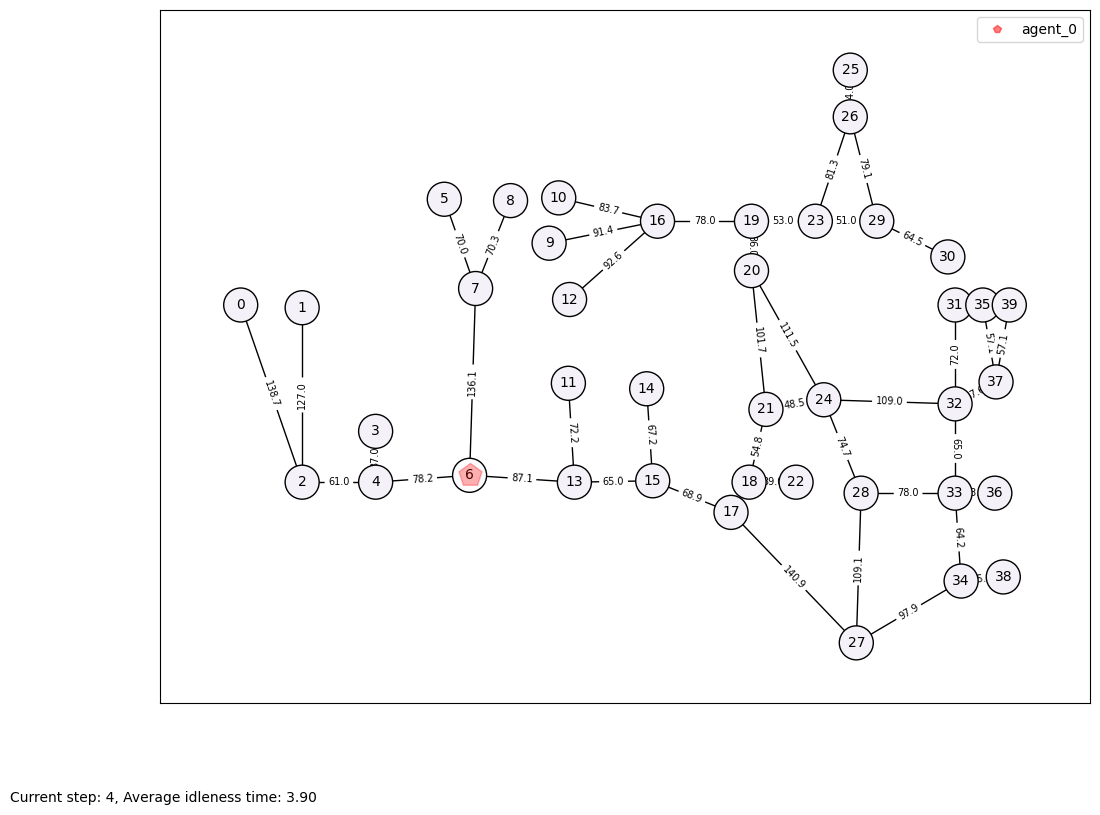

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x0000023A0C9DF5E0>: {'ready': True}, 'node_visits': array([0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 4.875, 'stddev_idleness': 0.7806247497997998, 'worst_idleness': 5.0}


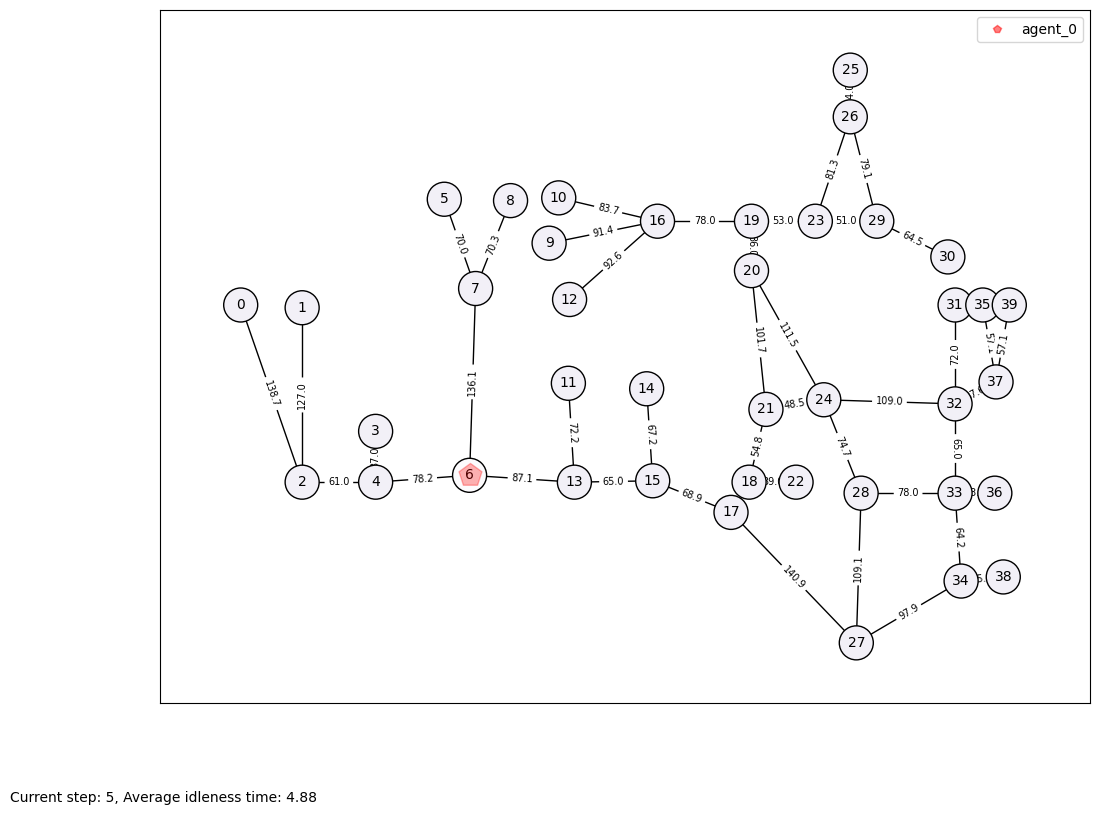

In [3]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 1,
                   speed = 40.0,
                #    observation_radius = 0,
                #    comms_model = CommunicationModel("bernoulli"),
                   require_explicit_visit=True
)

observations, infos = env.reset(seed=42)

print(infos)

# We temporarily fix the actions to a single node visit for each agent.
# actions = {agent: env.action_space(agent).sample() for agent in env.agents}
actions = {agent: 6 for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    print(infos)

    # clear_output(wait=True)
    env.render()

    # actions = {agent: 0 for agent in env.agents}
    i += 1
    if i >= 5:
        break
env.close()

In [1]:
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")

pygGraph = patrolGraph.getPyTorchGeometricGraph()
print(pygGraph)
print(f"Graph has {pygGraph.num_nodes} nodes.")
print(pygGraph.get_tensor_size())

Data(edge_index=[2, 88], x=[40, 3], edge_attr=[88, 1])
Graph has 40 nodes.
tensor([[ 31., 289.,   0.],
        [ 82., 160.,   0.],
        [ 82., 287.,   0.],
        [143., 160.,   0.],
        [143., 197.,   0.],
        [221., 165.,   0.],
        [200., 366.,   0.],
        [226., 301.,   0.],
        [308., 160.,   0.],
        [255., 365.,   0.],
        [287., 334.,   0.],
        [377., 350.,   0.],
        [295., 367.,   0.],
        [303., 232.,   0.],
        [304., 293.,   0.],
        [373., 161.,   0.],
        [368., 228.,   0.],
        [438., 138.,   0.],
        [455., 350.,   0.],
        [542.,  43.,   0.],
        [453., 160.,   0.],
        [467., 213.,   0.],
        [492., 160.,   0.],
        [455., 314.,   0.],
        [508., 350.,   0.],
        [515., 220.,   0.],
        [537., 426.,   0.],
        [559., 350.,   0.],
        [624., 217.,   0.],
        [546., 152.,   0.],
        [537., 460.,   0.],
        [629.,  88.,   0.],
        [624., 152.,   0.],
 

TypeError: getattr(): attribute name must be string